# 35. Нейронные сети и глубокое обучение

На этой неделе мы узнаем о нейронных сетях и построим модель для классификации изображений одежды.


## 35.1 Классификация одежды

## Датасет

* Ссылка на full (Google Drive): https://drive.google.com/file/d/1IATFPd6JoCe3W-Fdlf1ac6iyGuLwXet1/view?usp=sharing
* Ссылка на small (Google Drive): https://drive.google.com/file/d/1lgVaHvmhbtd4vZDQ-xP_jwdRsWhuQzJ_/view?usp=sharing

# Визуализация нейронных сетей:

* https://www.youtube.com/watch?v=RJCIYBAAiEI&t=266s&ab_channel=3Blue1BrowntranslatedbySciberia

## 35.2 TensorFlow и Keras

* Установка TensorFlow
* Загрузка изображений

In [1]:
pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.15.0'

In [6]:
from tensorflow.keras.preprocessing.image import load_img

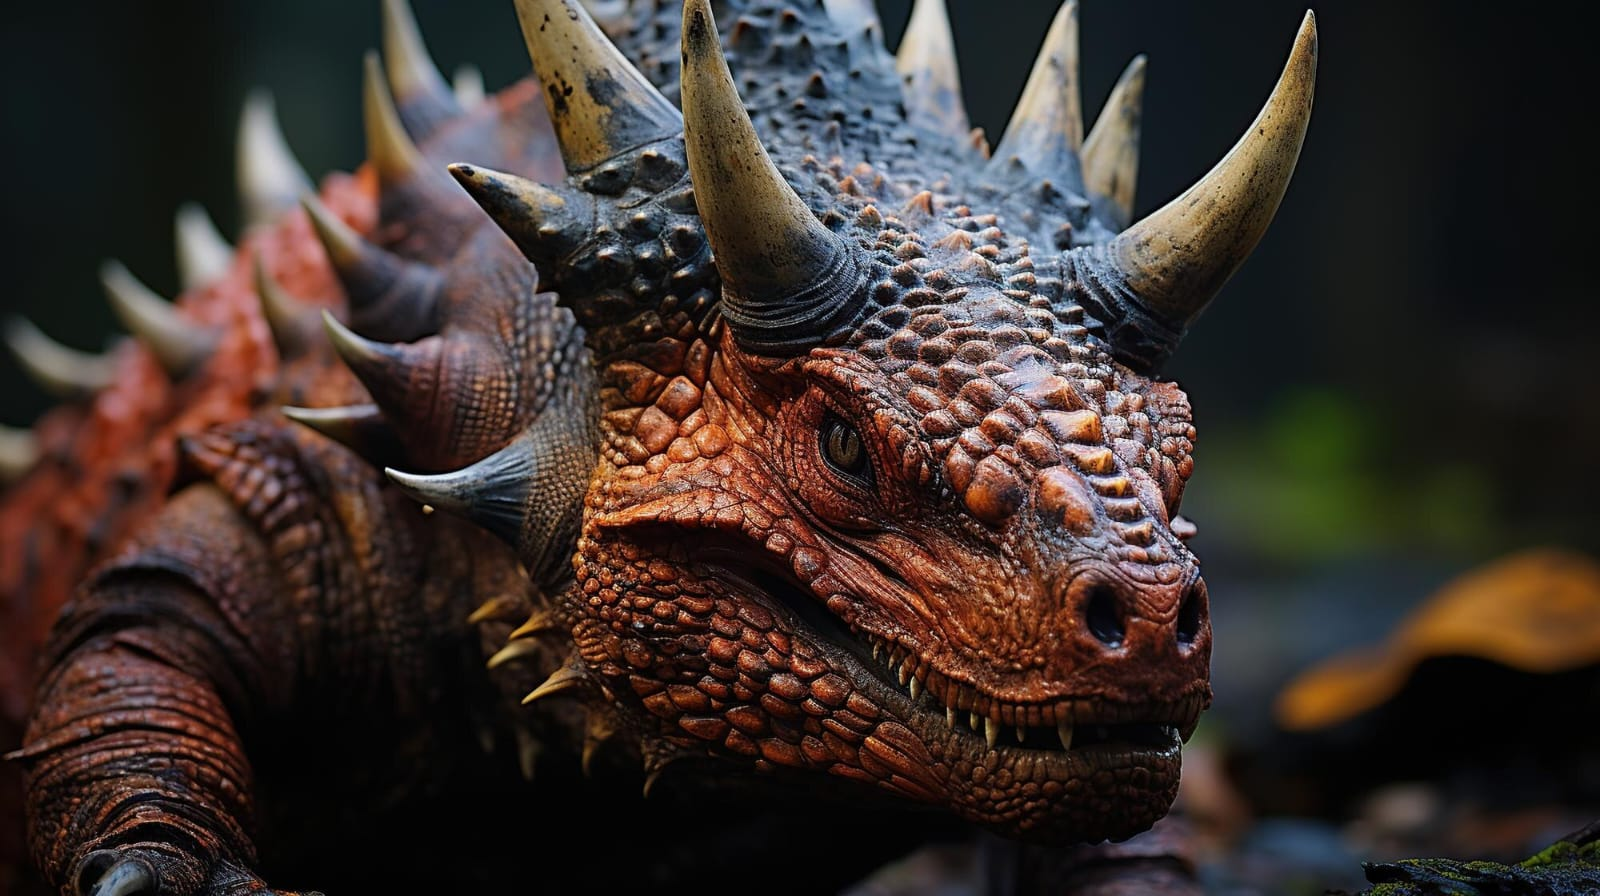

In [8]:
path = '/content/drive/MyDrive/Dragon_Dinasaur/test/Dinosaur'
name = '159d3b25-5f9e-4ee2-979a-dfdd5c41a90e.jpg'
fullname = f'{path}/{name}'
load_img(fullname)


In [9]:
img = load_img(fullname, target_size=(299, 299))

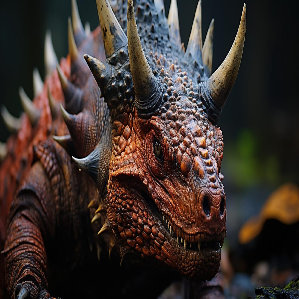

In [10]:
img

In [11]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7850F141BA00>


array([[[ 11,  17,  17],
        [ 11,  17,  17],
        [ 11,  17,  17],
        ...,
        [  6,  10,  11],
        [  6,  10,  11],
        [  6,  10,  11]],

       [[ 11,  17,  17],
        [ 11,  17,  17],
        [ 11,  17,  17],
        ...,
        [  6,  10,  11],
        [  6,  10,  11],
        [  6,  10,  11]],

       [[ 11,  17,  17],
        [ 11,  17,  17],
        [ 11,  17,  17],
        ...,
        [  6,  10,  11],
        [  6,  10,  11],
        [  6,  10,  11]],

       ...,

       [[ 22,   7,   4],
        [ 15,   5,   3],
        [ 10,   5,   2],
        ...,
        [ 18,  29,  33],
        [ 86,  89, 104],
        [ 24,  28,  37]],

       [[ 22,   7,   4],
        [ 15,   5,   3],
        [ 10,   5,   2],
        ...,
        [ 43,  55,  67],
        [  0,   7,  18],
        [ 42,  48,  72]],

       [[ 22,   7,   4],
        [ 15,   5,   3],
        [ 10,   5,   2],
        ...,
        [ 21,  28,  54],
        [ 58,  68,  70],
        [ 61,  68,  94]]], dtype=uint8)
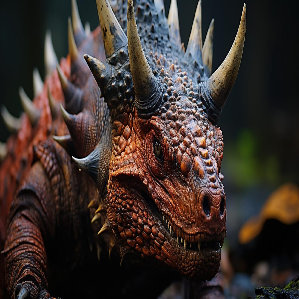

In [12]:
x = np.array(img)
x

In [13]:
x.shape

(299, 299, 3)

## 35.3 Предварительно обученные сверточные нейронные сети (convolutional neural networks)

* Набор данных Imagenet: https://www.image-net.org/
* Предварительно обученные модели: https://keras.io/api/applications/


In [14]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [15]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 [==============================] - 1s 0us/step


In [16]:
X = np.array([x])

In [17]:
X

array([[[[ 11,  17,  17],
         [ 11,  17,  17],
         [ 11,  17,  17],
         ...,
         [  6,  10,  11],
         [  6,  10,  11],
         [  6,  10,  11]],

        [[ 11,  17,  17],
         [ 11,  17,  17],
         [ 11,  17,  17],
         ...,
         [  6,  10,  11],
         [  6,  10,  11],
         [  6,  10,  11]],

        [[ 11,  17,  17],
         [ 11,  17,  17],
         [ 11,  17,  17],
         ...,
         [  6,  10,  11],
         [  6,  10,  11],
         [  6,  10,  11]],

        ...,

        [[ 22,   7,   4],
         [ 15,   5,   3],
         [ 10,   5,   2],
         ...,
         [ 18,  29,  33],
         [ 86,  89, 104],
         [ 24,  28,  37]],

        [[ 22,   7,   4],
         [ 15,   5,   3],
         [ 10,   5,   2],
         ...,
         [ 43,  55,  67],
         [  0,   7,  18],
         [ 42,  48,  72]],

        [[ 22,   7,   4],
         [ 15,   5,   3],
         [ 10,   5,   2],
         ...,
         [ 21,  28,  54],
        

In [18]:
X.shape

(1, 299, 299, 3)

In [19]:
X = preprocess_input(X)

In [20]:
X

array([[[[-0.9137255 , -0.8666667 , -0.8666667 ],
         [-0.9137255 , -0.8666667 , -0.8666667 ],
         [-0.9137255 , -0.8666667 , -0.8666667 ],
         ...,
         [-0.9529412 , -0.92156863, -0.9137255 ],
         [-0.9529412 , -0.92156863, -0.9137255 ],
         [-0.9529412 , -0.92156863, -0.9137255 ]],

        [[-0.9137255 , -0.8666667 , -0.8666667 ],
         [-0.9137255 , -0.8666667 , -0.8666667 ],
         [-0.9137255 , -0.8666667 , -0.8666667 ],
         ...,
         [-0.9529412 , -0.92156863, -0.9137255 ],
         [-0.9529412 , -0.92156863, -0.9137255 ],
         [-0.9529412 , -0.92156863, -0.9137255 ]],

        [[-0.9137255 , -0.8666667 , -0.8666667 ],
         [-0.9137255 , -0.8666667 , -0.8666667 ],
         [-0.9137255 , -0.8666667 , -0.8666667 ],
         ...,
         [-0.9529412 , -0.92156863, -0.9137255 ],
         [-0.9529412 , -0.92156863, -0.9137255 ],
         [-0.9529412 , -0.92156863, -0.9137255 ]],

        ...,

        [[-0.827451  , -0.94509804, -0

In [21]:
pred = model.predict(X)

1/1 [==============================] - 4s 4s/step


In [22]:
pred

array([[6.7863334e-04, 4.3118300e-04, 1.1673865e-03, 4.2756318e-04,
        1.4706816e-04, 7.5640011e-04, 2.0148329e-04, 6.6289571e-03,
        2.4774042e-03, 4.7714743e-04, 2.8457251e-04, 3.0454277e-04,
        3.1144073e-04, 4.2497527e-04, 2.4725689e-04, 4.0143251e-04,
        5.1667303e-04, 4.0610714e-04, 3.8439315e-04, 3.7875213e-04,
        3.6887368e-04, 2.5909941e-04, 1.4961682e-03, 1.8567875e-03,
        8.0187945e-04, 3.7933083e-04, 8.5049222e-04, 7.2252273e-04,
        5.0224038e-04, 8.1478723e-04, 9.7983005e-04, 3.5615335e-04,
        4.0819808e-03, 3.5590059e-04, 2.3790973e-04, 9.0958603e-04,
        5.1827071e-04, 1.5195578e-03, 3.0192807e-03, 1.6676773e-01,
        1.5057453e-04, 8.7595714e-04, 8.9307118e-04, 1.8185250e-02,
        1.3886180e-03, 2.8877587e-03, 1.0781564e-03, 1.3424901e-02,
        4.9601225e-03, 8.5765719e-03, 1.9106194e-03, 1.7450076e-01,
        2.9006260e-04, 2.7257658e-04, 7.4624328e-04, 4.9563323e-04,
        1.9068086e-04, 3.6187924e-04, 1.8048947e

In [23]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n01704323', 'triceratops', 0.17450076),
  ('n01677366', 'common_iguana', 0.16676773),
  ('n01688243', 'frilled_lizard', 0.01818525),
  ('n02321529', 'sea_cucumber', 0.014197982),
  ('n01694178', 'African_chameleon', 0.013424901)]]

## 35.4 Сверточные нейронные сети (Convolutional Neural Networks (CNN))

* Типы слоев: сверточные (convolutional) и полносвязные (dense)
* Сверточные слои (Convolutional layers) и фильтры
* Полносвязные слои (Dense layers)

Есть и другие слои. Читайте здесь: https://cs231n.github.io/

## 35.5 Перенос обучения (Transfer Learning)

* Чтение данных с помощью ImageDataGenerator
* Обучение Xception на изображениях меньшего размера (150x150)


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    '/content/drive/MyDrive/Dragon_Dinasaur/train',
    target_size=(150, 150),
    batch_size=32
)

Found 6 images belonging to 2 classes.


In [26]:
train_ds.class_indices

{'Dinosaur': 0, 'Dragons': 1}

In [27]:
X, y = next(train_ds)

In [28]:
y[:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [29]:
X.shape

(6, 150, 150, 3)

In [30]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/content/drive/MyDrive/Dragon_Dinasaur/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 6 images belonging to 2 classes.


In [36]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(2)(vectors)

model = keras.Model(inputs, outputs)

In [38]:
learning_rate = 0.05
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [39]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
1/1 [==============================] - 8s 8s/step - loss: 1.4116 - accuracy: 0.0000e+00 - val_loss: 1.7764 - val_accuracy: 0.8333
Epoch 2/5
1/1 [==============================] - 0s 264ms/step - loss: 0.0562 - accuracy: 1.0000 - val_loss: 1.5400 - val_accuracy: 0.8333
Epoch 3/5
1/1 [==============================] - 0s 248ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.4726 - val_accuracy: 0.8333
Epoch 4/5
1/1 [==============================] - 0s 253ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.4650 - val_accuracy: 0.8333
Epoch 5/5
1/1 [==============================] - 0s 260ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.6854 - val_accuracy: 0.6667


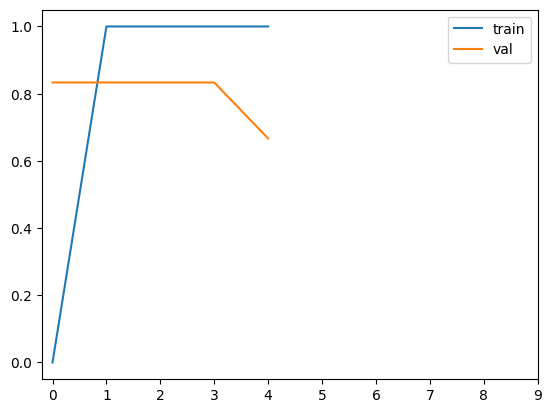

In [40]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 35.6 Корректировка скорости обучения

* Что такое скорость обучения
* Пробуем разные значения

In [41]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(2)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [42]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 1.1612 - accuracy: 0.1667 - val_loss: 0.8046 - val_accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 0s 249ms/step - loss: 1.1166 - accuracy: 0.1667 - val_loss: 0.7909 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 249ms/step - loss: 1.0734 - accuracy: 0.1667 - val_loss: 0.7773 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 251ms/step - loss: 1.0315 - accuracy: 0.1667 - val_loss: 0.7639 - val_accuracy: 0.8333
Epoch 5/10
1/1 [==============================] - 0s 236ms/step - loss: 0.9910 - accuracy: 0.1667 - val_loss: 0.7507 - val_accuracy: 0.8333
Epoch 6/10
1/1 [==============================] - 0s 235ms/step - loss: 0.9519 - accuracy: 0.1667 - val_loss: 0.7377 - val_accuracy: 0.8333
Epoch 7/10
1/1 [==============================] - 0s 245ms/step - loss: 0.9144 - accuracy: 0.3333 - val_loss: 0.7249 - val_accuracy: 0.8333
Epoch 8/10
1/1 [

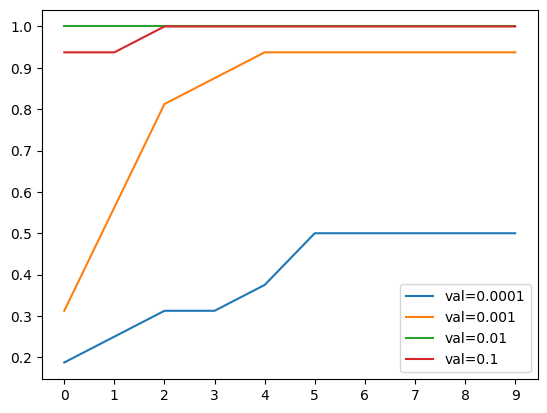

In [ ]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [43]:
del scores[0.001]
del scores[0.0001]

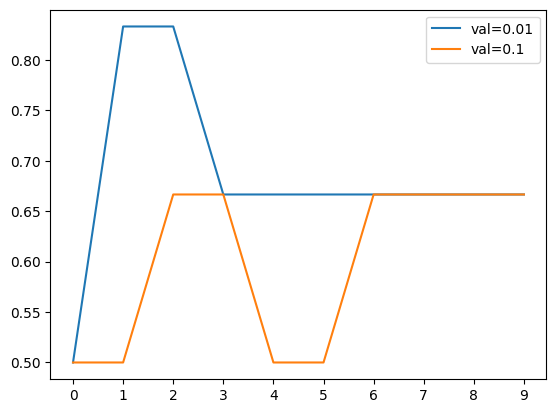

In [44]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [45]:
learning_rate = 0.01

## 35.7 Создание контрольных точек

* Сохранение лучшей модели
* Обучение модели с обратными вызовами (callbacks)

In [46]:
model.save_weights('model_v1.h5', save_format='h5')

In [47]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [48]:
learning_rate = 0.01

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: 0.8859 - accuracy: 0.3333

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 4s 4s/step - loss: 0.8859 - accuracy: 0.3333 - val_loss: 0.8518 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 1s 618ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.9830 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 474ms/step - loss: 4.6871e-04 - accuracy: 1.0000 - val_loss: 1.1303 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 318ms/step - loss: 3.2363e-05 - accuracy: 1.0000 - val_loss: 1.2705 - val_accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 499ms/step - loss: 3.7551e-06 - accuracy: 1.0000 - val_loss: 1.3963 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 0s 354ms/step - loss: 6.1591e-07 - accuracy: 1.0000 - val_loss: 1.5076 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 0s 352ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 1.6061 - val_accuracy: 0.6667
Epoch 8/10
1/1

## 35.8 Добавление дополнительных слоёв

* Добавление одного внутреннего полносвязного слоя
* Экспериментирование с разными размерами внутреннего слоя

In [50]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(2)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [51]:
learning_rate = 0.01

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.7456 - accuracy: 0.5000 - val_loss: 2.8943 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 233ms/step - loss: 3.0659 - accuracy: 0.5000 - val_loss: 0.6687 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 251ms/step - loss: 0.4758 - accuracy: 0.6667 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 252ms/step - loss: 0.4083 - accuracy: 1.0000 - val_loss: 0.7361 - val_accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 0s 265ms/step - loss: 0.3386 - accuracy: 1.0000 - val_loss: 0.7401 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 251ms/step - loss: 0.3366 - accuracy: 0.8333 - val_loss: 0.6883 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 260ms/step - loss: 0.3190 - accuracy: 1.0000 - val_loss: 0.6703 - val_accuracy: 0.5000
Epoch 8/10
1/1 [====

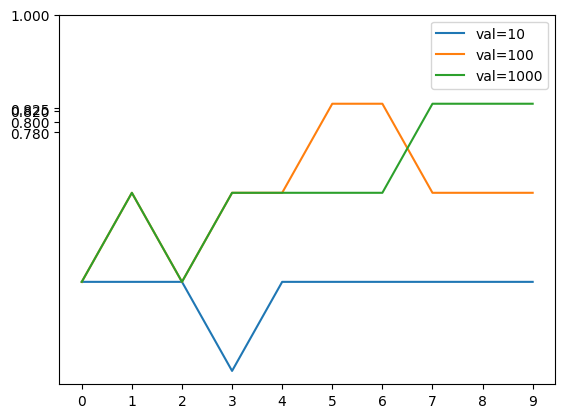

In [52]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 1.00])
plt.legend()

## 35.9 Регуляризация и dropout

* Регуляризация путем замораживания части сети
* Добавление dropout в нашу модель
* Экспериментирование с разными значениями

In [53]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(2)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [55]:
learning_rate = 0.01
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=500, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.7122 - accuracy: 0.5000 - val_loss: 0.2400 - val_accuracy: 0.8333
Epoch 2/100
1/1 [==============================] - 0s 254ms/step - loss: 3.3208e-04 - accuracy: 1.0000 - val_loss: 0.3993 - val_accuracy: 0.6667
Epoch 3/100
1/1 [==============================] - 0s 247ms/step - loss: 8.7420e-07 - accuracy: 1.0000 - val_loss: 0.6822 - val_accuracy: 0.8333
Epoch 4/100
1/1 [==============================] - 0s 260ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9765 - val_accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 0s 282ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.2599 - val_accuracy: 0.8333
Epoch 6/100
1/1 [==============================] - 0s 241ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.5407 - val_accuracy: 0.8333
Epoch 7/100
1/1 [==============================] - 0s 242ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.8177 - val_accur

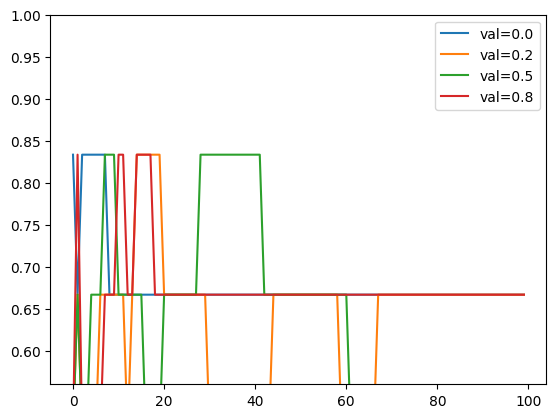

In [57]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.56, 1.00)
plt.legend()

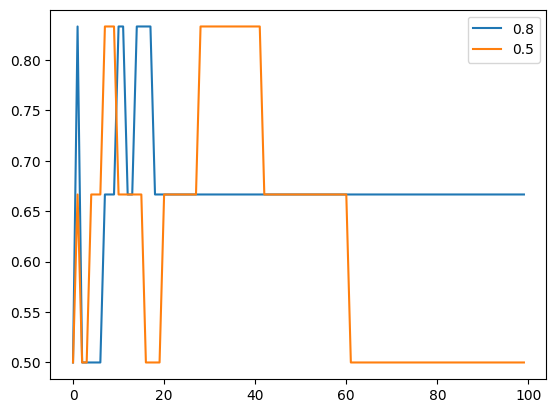

In [58]:
hist = scores[0.8]
plt.plot(hist['val_accuracy'], label=0.8)

hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 35.10 Аугментация данных

* Различные методы аугментации данных
* Обучение модели с аугментациями
* Как выбирать методы аугментации данных?

In [61]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    'drive/MyDrive/Dragon_Dinasaur/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    'drive/MyDrive/Dragon_Dinasaur/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [63]:
learning_rate = 0.01
size = 100
droprate = 0.8

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=200, validation_data=val_ds)

Epoch 1/200
1/1 [==============================] - 5s 5s/step - loss: 1.3434 - accuracy: 0.1667 - val_loss: 2.1291 - val_accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 287ms/step - loss: 5.2425 - accuracy: 0.8333 - val_loss: 0.6196 - val_accuracy: 0.6667
Epoch 3/200
1/1 [==============================] - 0s 252ms/step - loss: 7.1680 - accuracy: 0.5000 - val_loss: 0.7707 - val_accuracy: 0.6667
Epoch 4/200
1/1 [==============================] - 0s 254ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 1.0567 - val_accuracy: 0.6667
Epoch 5/200
1/1 [==============================] - 0s 251ms/step - loss: 1.8859 - accuracy: 0.8333 - val_loss: 0.2751 - val_accuracy: 0.8333
Epoch 6/200
1/1 [==============================] - 0s 270ms/step - loss: 6.6495 - accuracy: 0.5000 - val_loss: 0.3348 - val_accuracy: 0.8333
Epoch 7/200
1/1 [==============================] - 0s 254ms/step - loss: 9.1814 - accuracy: 0.6667 - val_loss: 0.7878 - val_accuracy: 0.6667
Epoch 8/200
1/1 

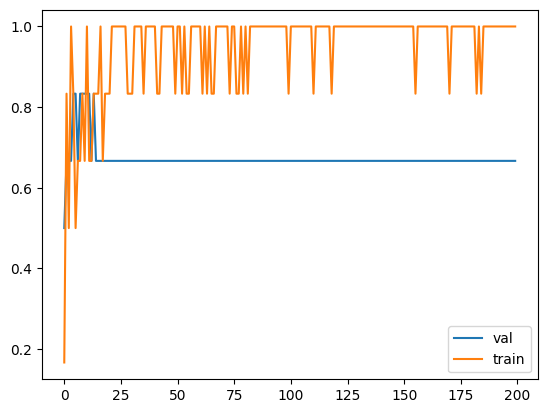

In [64]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 35.11 Обучение более крупной модели

* Обучение модели размером 299x299

In [65]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.8):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(2)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [66]:
input_size = 299

In [68]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    'drive/MyDrive/Dragon_Dinasaur/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    'drive/MyDrive/Dragon_Dinasaur/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [69]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [70]:
learning_rate = 0.01
size = 100
droprate = 0.8

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=80, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/80
1/1 [==============================] - 7s 7s/step - loss: 0.6958 - accuracy: 0.5000 - val_loss: 0.8596 - val_accuracy: 0.5000
Epoch 2/80
1/1 [==============================] - 1s 515ms/step - loss: 2.0356 - accuracy: 0.5000 - val_loss: 1.6960 - val_accuracy: 0.5000
Epoch 3/80
1/1 [==============================] - 1s 525ms/step - loss: 5.0889 - accuracy: 0.6667 - val_loss: 1.3189 - val_accuracy: 0.5000
Epoch 4/80
1/1 [==============================] - 1s 944ms/step - loss: 3.9063 - accuracy: 0.5000 - val_loss: 0.6589 - val_accuracy: 0.6667
Epoch 5/80
1/1 [==============================] - 1s 864ms/step - loss: 3.1813 - accuracy: 0.6667 - val_loss: 0.6843 - val_accuracy: 0.8333
Epoch 6/80
1/1 [==============================] - 1s 586ms/step - loss: 3.7763 - accuracy: 0.6667 - val_loss: 0.4357 - val_accuracy: 0.8333
Epoch 7/80
1/1 [==============================] - 1s 551ms/step - loss: 3.3279 - accuracy: 0.5000 - val_loss: 0.3750 - val_accuracy: 0.6667
Epoch 8/80
1/1 [=======

## 35.12 Использование модели

* Загрузка модели
* Оценка модели
* Получение прогнозов

In [71]:
import tensorflow as tf
from tensorflow import keras

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [74]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    'drive/MyDrive/Dragon_Dinasaur/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 6 images belonging to 2 classes.


In [76]:
model = keras.models.load_model('xception_v1_02_0.667.h5')

In [77]:
model.evaluate(test_ds)

1/1 [==============================] - 1s 1s/step - loss: 0.5442 - accuracy: 0.8333


[0.5441945195198059, 0.8333333134651184]

In [79]:
path = 'drive/MyDrive/Dragon_Dinasaur/test/Dragons/3dab7642-9f80-4068-afc0-f08eea077fc3.jpg'

In [83]:
img = load_img(path, target_size=(150, 150))

In [84]:
import numpy as np

In [85]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 150, 150, 3)

In [86]:
X = preprocess_input(X)

In [87]:
pred = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [88]:
classes = [
    'Dinosaur',
    'Dragons'
]

In [89]:
dict(zip(classes, pred[0]))

{'Dinosaur': -1.5179843, 'Dragons': 0.92308855}

## 35.13 Итог

* Мы можем использовать предварительно обученные модели для общей классификации изображений
* Сверточные слои позволяют преобразовать изображение в вектор
* Полносвязные слои используют этот вектор для выработки прогнозов
* Вместо обучения модели с нуля, мы можем использовать перенос обучения и повторно использовать уже обученные сверточные слои
* Сначала обучите маленькую модель (150x150), прежде чем обучать большую (299x299)
* Скорость обучения - насколько быстро обучается модель. Быстрые ученики не всегда являются лучшими
* Мы можем сохранять лучшую модель с помощью обратных вызовов и создания контрольных точек
* Чтобы избежать переобучения, используйте dropout и аугментацию.

## 35.14 Исследуйте дальше

* Добавьте больше данных, например, Zalando и т.д.
* Albumentations - другой способ создания аугментаций
* Используйте PyTorch или MXNet вместо TensorFlow/Keras
* Помимо Xception, существуют другие архитектуры - попробуйте их
Другие проекты:

* Коты против собак
* Хотдог или не хотдог
* Категории изображений

